In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

features_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/acsincome_ca_features.csv')
labels_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/acsincome_ca_labels.csv')
race_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/TP2-complementary_data/acsincome_ca_group_Race.csv')

data = pd.concat([features_df, labels_df], axis=1)
num_samples = int(len(data) * 0.1)

unique_races = race_df['RAC1P'].unique()
datas = []

for race_value in unique_races:
    datas.append((data[data['RAC1P']==race_value],race_value))
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []
for i in unique_races:
    X_train, X_test, y_train, y_test = train_test_split(data[data['RAC1P']==i].drop('PINCP', axis=1)[:num_samples], data[data['RAC1P']==i]['PINCP'][:num_samples], test_size=0.2, random_state=42)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

print(unique_races)

[8 1 9 2 3 7 6 5 4]


In [39]:
svm_model = SVC(C=1, kernel='rbf')
rf_model = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=100)
ab_model = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.5, n_estimators=20)
gb_model = GradientBoostingClassifier(criterion="friedman_mse", learning_rate= 0.5, loss='log_loss', n_estimators=50, subsample=1.0)

accuracies_svm = []
accuracies_rf = []
accuracies_ab = []
accuracies_gb = []

false_positive_svm = []
false_positive_rf = []
false_positive_ab = []
false_positive_gb = []

false_negative_svm = []
false_negative_rf = []
false_negative_ab = []
false_negative_gb = []

races = []

for i in range(len(X_train_list)):
    svm_model.fit(X_train_list[i], y_train_list[i])
    rf_model.fit(X_train_list[i], y_train_list[i])
    ab_model.fit(X_train_list[i], y_train_list[i])
    gb_model.fit(X_train_list[i], y_train_list[i])
    
    y_pred_svm = svm_model.predict(X_test_list[i])
    y_pred_rf = rf_model.predict(X_test_list[i])
    y_pred_ab = ab_model.predict(X_test_list[i])
    y_pred_gb = gb_model.predict(X_test_list[i])
    
    confusion_svm = confusion_matrix(y_test_list[i], y_pred_svm)
    confusion_rf = confusion_matrix(y_test_list[i], y_pred_rf)
    confusion_ab = confusion_matrix(y_test_list[i], y_pred_ab)
    confusion_gb = confusion_matrix(y_test_list[i], y_pred_gb)
    
    n = X_train_list[i]['RAC1P'].mean()
    print(f"Matrice de confusion SVM Race {n}:\n", confusion_svm)
    print(f"Matrice de confusion Random Forest Race {n}:\n", confusion_rf)
    print(f"Matrice de confusion Adaboost Race {n}:\n", confusion_ab)
    print(f"Matrice de confusion Gradient Boosting Race {n}:\n", confusion_gb)

    accuracy_svm = accuracy_score(y_test_list[i], y_pred_svm)
    accuracy_rf = accuracy_score(y_test_list[i], y_pred_rf)
    accuracy_ab = accuracy_score(y_test_list[i], y_pred_ab)
    accuracy_gb = accuracy_score(y_test_list[i], y_pred_gb)

    print(f"Accuracy SVM Race {n}:\n", accuracy_svm)
    print(f"Accuracy Random Forest Race {n}:\n", accuracy_rf)
    print(f"Accuracy Adaboost Race {n}:\n", accuracy_ab)
    print(f"Accuracy Gradient Boosting Race {n}:\n", accuracy_gb)

    class_rep_svm = classification_report(y_test_list[i], y_pred_svm)
    class_rep_rf = classification_report(y_test_list[i], y_pred_rf)
    class_rep_ab = classification_report(y_test_list[i], y_pred_ab)
    class_rep_gb = classification_report(y_test_list[i], y_pred_gb)
    
    print(f"Classification report SVM Race {n}:\n", class_rep_svm)
    print(f"Classification report Random Forest Race {n}:\n", class_rep_rf)
    print(f"Classification report Adaboost Race {n}:\n", class_rep_ab)
    print(f"Classification report Gradient Boosting Race {n}:\n", class_rep_gb)
    
    FP_svm = (confusion_svm[0, 1] / (confusion_svm[1, 1] + confusion_svm[0, 1])) 
    FP_rf = (confusion_rf[0, 1] / (confusion_rf[1, 1] + confusion_rf[0, 1]))
    FP_ab = (confusion_ab[0, 1] / (confusion_ab[1, 1] + confusion_ab[0, 1])) 
    FP_gb = (confusion_gb[0, 1] / (confusion_gb[1, 1] + confusion_gb[0, 1]))

    print(f"False Positive Ratio Race {n} (SVM):\n", FP_svm)
    print(f"False Positive Ratio Race {n} (Random Forest):\n", FP_rf)
    print(f"False Positive Ratio Race {n} (AdaBoost):\n", FP_ab)
    print(f"False Positive Ratio Race {n} (Gradient Boosting):\n", FP_gb)
    
    FN_svm = (confusion_svm[1, 0] / (confusion_svm[0, 0] + confusion_svm[1, 0])) 
    FN_rf = (confusion_rf[1, 0] / (confusion_rf[0, 0] + confusion_rf[1, 0]))
    FN_ab = (confusion_ab[1, 0] / (confusion_ab[0, 0] + confusion_ab[1, 0])) 
    FN_gb = (confusion_gb[1, 0] / (confusion_gb[0, 0] + confusion_gb[1, 0]))
    
    
    print(f"False Negative Ratio Race {n} (SVM):\n", FN_svm)
    print(f"False Negative Ratio Race {n} (Random Forest):\n", FN_rf)
    print(f"False Negative Ratio Race {n} (AdaBoost):\n", FN_ab)
    print(f"False Negative Ratio Race {n} (Gradient Boosting):\n", FN_gb)
    
    accuracies_svm.append(accuracy_svm)
    accuracies_rf.append(accuracy_rf)
    accuracies_ab.append(accuracy_ab)
    accuracies_gb.append(accuracy_gb)

    false_positive_svm.append(FP_svm)
    false_positive_rf.append(FP_rf)
    false_positive_ab.append(FP_ab)
    false_positive_gb.append(FP_gb)
    
    false_negative_svm.append(FN_svm)
    false_negative_rf.append(FN_rf)
    false_negative_ab.append(FN_ab)
    false_negative_gb.append(FN_gb)
    
    races.append(n)
    
    

Matrice de confusion SVM Race 8.0:
 [[3164    0]
 [ 750    0]]
Matrice de confusion Random Forest Race 8.0:
 [[3068   96]
 [ 480  270]]
Matrice de confusion Adaboost Race 8.0:
 [[3049  115]
 [ 496  254]]
Matrice de confusion Gradient Boosting Race 8.0:
 [[3007  157]
 [ 413  337]]
Accuracy SVM Race 8.0:
 0.8083801737353091
Accuracy Random Forest Race 8.0:
 0.8528359734287174
Accuracy Adaboost Race 8.0:
 0.8438937148696986
Accuracy Gradient Boosting Race 8.0:
 0.8543689320388349
Classification report SVM Race 8.0:
               precision    recall  f1-score   support

       False       0.81      1.00      0.89      3164
        True       0.00      0.00      0.00       750

    accuracy                           0.81      3914
   macro avg       0.40      0.50      0.45      3914
weighted avg       0.65      0.81      0.72      3914

Classification report Random Forest Race 8.0:
               precision    recall  f1-score   support

       False       0.86      0.97      0.91      316

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8462/19

Matrice de confusion SVM Race 1.0:
 [[1937  401]
 [ 754  822]]
Matrice de confusion Random Forest Race 1.0:
 [[2005  333]
 [ 365 1211]]
Matrice de confusion Adaboost Race 1.0:
 [[2018  320]
 [ 436 1140]]
Matrice de confusion Gradient Boosting Race 1.0:
 [[2006  332]
 [ 363 1213]]
Accuracy SVM Race 1.0:
 0.704905467552376
Accuracy Random Forest Race 1.0:
 0.8216658150229944
Accuracy Adaboost Race 1.0:
 0.8068472151251916
Accuracy Gradient Boosting Race 1.0:
 0.8224322943280531
Classification report SVM Race 1.0:
               precision    recall  f1-score   support

       False       0.72      0.83      0.77      2338
        True       0.67      0.52      0.59      1576

    accuracy                           0.70      3914
   macro avg       0.70      0.68      0.68      3914
weighted avg       0.70      0.70      0.70      3914

Classification report Random Forest Race 1.0:
               precision    recall  f1-score   support

       False       0.85      0.86      0.85      2338

Matrice de confusion SVM Race 7.0:
 [[89  0]
 [39  0]]
Matrice de confusion Random Forest Race 7.0:
 [[81  8]
 [19 20]]
Matrice de confusion Adaboost Race 7.0:
 [[86  3]
 [23 16]]
Matrice de confusion Gradient Boosting Race 7.0:
 [[75 14]
 [16 23]]
Accuracy SVM Race 7.0:
 0.6953125
Accuracy Random Forest Race 7.0:
 0.7890625
Accuracy Adaboost Race 7.0:
 0.796875
Accuracy Gradient Boosting Race 7.0:
 0.765625
Classification report SVM Race 7.0:
               precision    recall  f1-score   support

       False       0.70      1.00      0.82        89
        True       0.00      0.00      0.00        39

    accuracy                           0.70       128
   macro avg       0.35      0.50      0.41       128
weighted avg       0.48      0.70      0.57       128

Classification report Random Forest Race 7.0:
               precision    recall  f1-score   support

       False       0.81      0.91      0.86        89
        True       0.71      0.51      0.60        39

    accuracy 

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8462/19

Matrice de confusion SVM Race 6.0:
 [[1582  520]
 [ 694 1118]]
Matrice de confusion Random Forest Race 6.0:
 [[1701  401]
 [ 317 1495]]
Matrice de confusion Adaboost Race 6.0:
 [[1694  408]
 [ 367 1445]]
Matrice de confusion Gradient Boosting Race 6.0:
 [[1713  389]
 [ 318 1494]]
Accuracy SVM Race 6.0:
 0.6898313745528871
Accuracy Random Forest Race 6.0:
 0.8165559529892693
Accuracy Adaboost Race 6.0:
 0.8019928461931528
Accuracy Gradient Boosting Race 6.0:
 0.8193663771078181
Classification report SVM Race 6.0:
               precision    recall  f1-score   support

       False       0.70      0.75      0.72      2102
        True       0.68      0.62      0.65      1812

    accuracy                           0.69      3914
   macro avg       0.69      0.68      0.69      3914
weighted avg       0.69      0.69      0.69      3914

Classification report Random Forest Race 6.0:
               precision    recall  f1-score   support

       False       0.84      0.81      0.83      210

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8462/19

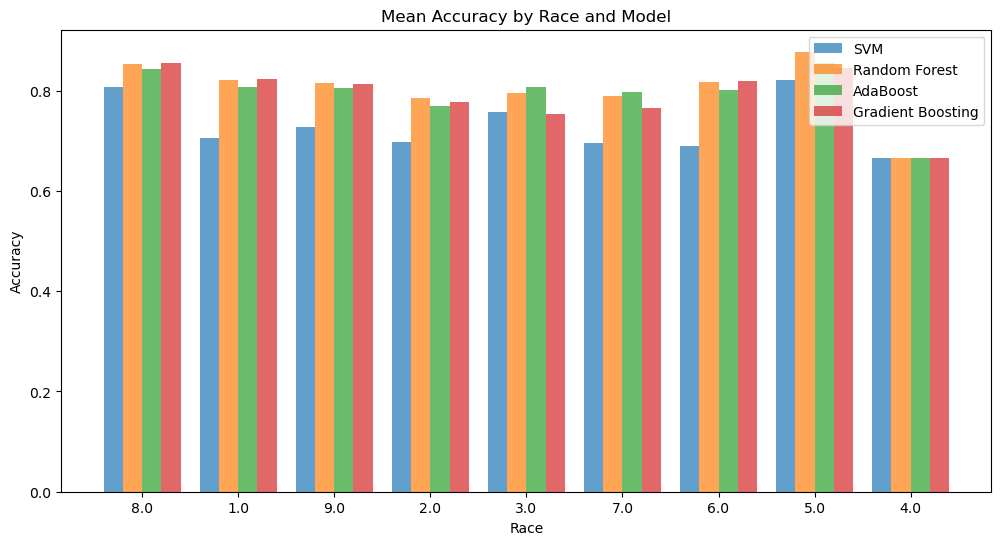

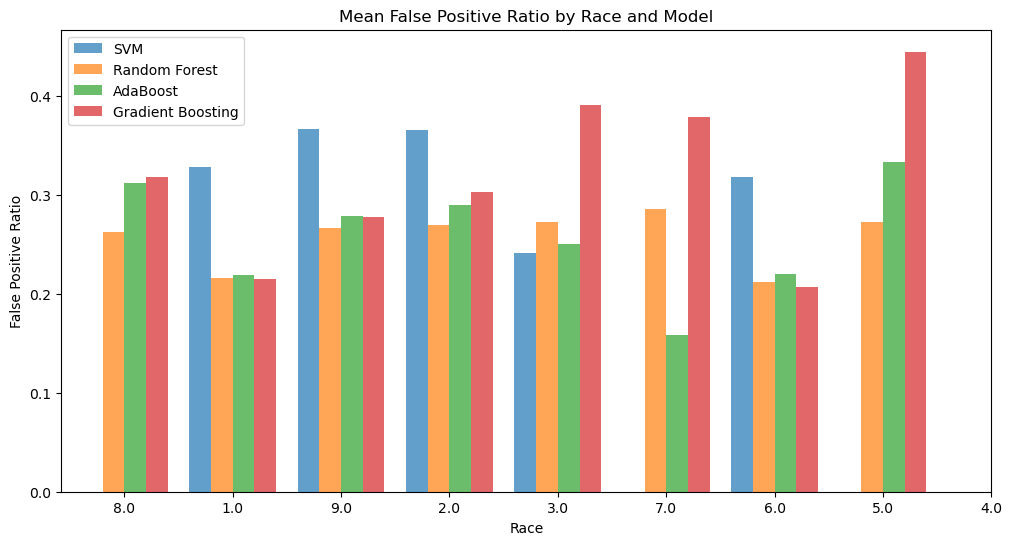

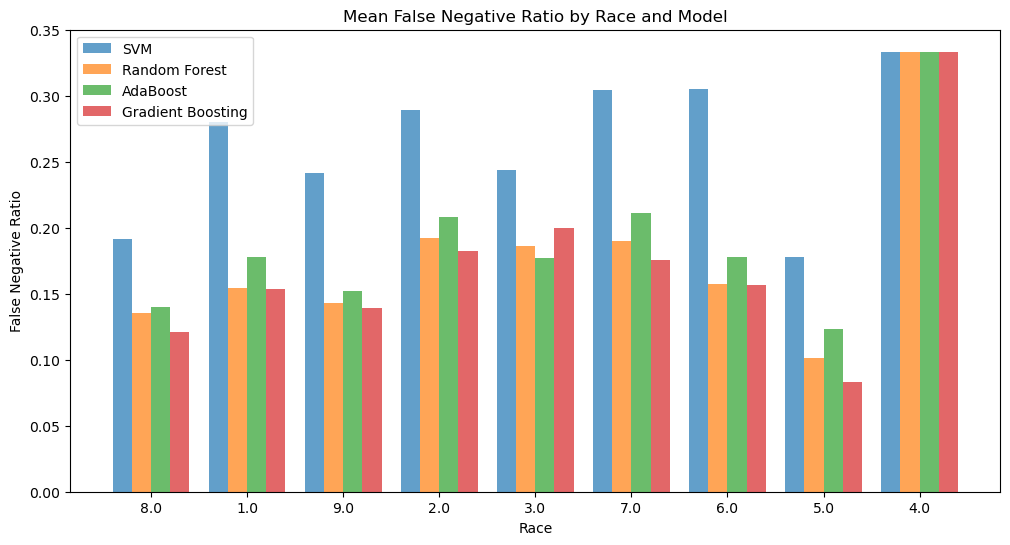

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

accuracies_svm = np.array(accuracies_svm)
accuracies_rf = np.array(accuracies_rf)
accuracies_ab = np.array(accuracies_ab)
accuracies_gb = np.array(accuracies_gb)

false_positive_svm = np.array(false_positive_svm)
false_positive_rf = np.array(false_positive_rf)
false_positive_ab = np.array(false_positive_ab)
false_positive_gb = np.array(false_positive_gb)

false_negative_svm = np.array(false_negative_svm)
false_negative_rf = np.array(false_negative_rf)
false_negative_ab = np.array(false_negative_ab)
false_negative_gb = np.array(false_negative_gb)

bar_width = 0.2
bar_positions = np.arange(len(races))

plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 1.5 * bar_width, accuracies_svm, width=bar_width, label='SVM', alpha=0.7)
plt.bar(bar_positions - 0.5 * bar_width, accuracies_rf, width=bar_width, label='Random Forest', alpha=0.7)
plt.bar(bar_positions + 0.5 * bar_width, accuracies_ab, width=bar_width, label='AdaBoost', alpha=0.7)
plt.bar(bar_positions + 1.5 * bar_width, accuracies_gb, width=bar_width, label='Gradient Boosting', alpha=0.7)

plt.title('Mean Accuracy by Race and Model')
plt.xlabel('Race')
plt.ylabel('Accuracy')
plt.xticks(bar_positions, races)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 1.5 * bar_width, false_positive_svm, width=bar_width, label='SVM', alpha=0.7)
plt.bar(bar_positions - 0.5 * bar_width, false_positive_rf, width=bar_width, label='Random Forest', alpha=0.7)
plt.bar(bar_positions + 0.5 * bar_width, false_positive_ab, width=bar_width, label='AdaBoost', alpha=0.7)
plt.bar(bar_positions + 1.5 * bar_width, false_positive_gb, width=bar_width, label='Gradient Boosting', alpha=0.7)

plt.title('Mean False Positive Ratio by Race and Model')
plt.xlabel('Race')
plt.ylabel('False Positive Ratio')
plt.xticks(bar_positions, races)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 1.5 * bar_width, false_negative_svm, width=bar_width, label='SVM', alpha=0.7)
plt.bar(bar_positions - 0.5 * bar_width, false_negative_rf, width=bar_width, label='Random Forest', alpha=0.7)
plt.bar(bar_positions + 0.5 * bar_width, false_negative_ab, width=bar_width, label='AdaBoost', alpha=0.7)
plt.bar(bar_positions + 1.5 * bar_width, false_negative_gb, width=bar_width, label='Gradient Boosting', alpha=0.7)

plt.title('Mean False Negative Ratio by Race and Model')
plt.xlabel('Race')
plt.ylabel('False Negative Ratio')
plt.xticks(bar_positions, races)
plt.legend()
plt.show()

In [41]:
features_df = pd.read_csv('/home/yduan/5aS9/Apprentissage_supervise/TP2-complementary_data/acsincome_ca_features_without_race.csv')

merged_df = pd.merge(features_df, race_df, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, labels_df, left_index=True, right_index=True)

num_samples = int(len(data) * 0.1)

unique_races = race_df['RAC1P'].unique()
datas = []

for race_value in unique_races:
    datas.append((merged_df[merged_df['RAC1P']==race_value],race_value))
sX_train_list = []
sX_test_list = []
sy_train_list = []
sy_test_list = []
for i in unique_races:
    sX_train, sX_test, sy_train, sy_test = train_test_split(merged_df[merged_df['RAC1P']==i].drop('PINCP', axis=1).drop('RAC1P', axis=1)[:num_samples], merged_df[merged_df['RAC1P']==i]['PINCP'][:num_samples], test_size=0.2, random_state=42)
    sX_train_list.append(sX_train)
    sX_test_list.append(sX_test)
    sy_train_list.append(sy_train)
    sy_test_list.append(sy_test)

In [42]:
saccuracies_svm = []
saccuracies_rf = []
saccuracies_ab = []
saccuracies_gb = []

sfalse_positive_svm = []
sfalse_positive_rf = []
sfalse_positive_ab = []
sfalse_positive_gb = []

sfalse_negative_svm = []
sfalse_negative_rf = []
sfalse_negative_ab = []
sfalse_negative_gb = []

races = []

for i in range(len(sX_train_list)):
    svm_model.fit(sX_train_list[i], sy_train_list[i])
    rf_model.fit(sX_train_list[i], sy_train_list[i])
    ab_model.fit(sX_train_list[i], sy_train_list[i])
    gb_model.fit(sX_train_list[i], sy_train_list[i])
    
    sy_pred_svm = svm_model.predict(sX_test_list[i])
    sy_pred_rf = rf_model.predict(sX_test_list[i])
    sy_pred_ab = ab_model.predict(sX_test_list[i])
    sy_pred_gb = gb_model.predict(sX_test_list[i])
    
    sconfusion_svm = confusion_matrix(sy_test_list[i], sy_pred_svm)
    sconfusion_rf = confusion_matrix(sy_test_list[i], sy_pred_rf)
    sconfusion_ab = confusion_matrix(sy_test_list[i], sy_pred_ab)
    sconfusion_gb = confusion_matrix(sy_test_list[i], sy_pred_gb)
    
    n = unique_races[i]
    print(f"Matrice de confusion SVM Race {n}:\n", sconfusion_svm)
    print(f"Matrice de confusion Random Forest Race {n}:\n", sconfusion_rf)
    print(f"Matrice de confusion Adaboost Race {n}:\n", sconfusion_ab)
    print(f"Matrice de confusion Gradient Boosting Race {n}:\n", sconfusion_gb)

    saccuracy_svm = accuracy_score(sy_test_list[i], sy_pred_svm)
    saccuracy_rf = accuracy_score(sy_test_list[i], sy_pred_rf)
    saccuracy_ab = accuracy_score(sy_test_list[i], sy_pred_ab)
    saccuracy_gb = accuracy_score(sy_test_list[i], sy_pred_gb)

    print(f"Accuracy SVM Race {n}:\n", saccuracy_svm)
    print(f"Accuracy Random Forest Race {n}:\n", saccuracy_rf)
    print(f"Accuracy Adaboost Race {n}:\n", saccuracy_ab)
    print(f"Accuracy Gradient Boosting Race {n}:\n", saccuracy_gb)

    sclass_rep_svm = classification_report(sy_test_list[i], sy_pred_svm)
    sclass_rep_rf = classification_report(sy_test_list[i], sy_pred_rf)
    sclass_rep_ab = classification_report(sy_test_list[i], sy_pred_ab)
    sclass_rep_gb = classification_report(sy_test_list[i], sy_pred_gb)
    
    print(f"Classification report SVM Race {n}:\n", class_rep_svm)
    print(f"Classification report Random Forest Race {n}:\n", class_rep_rf)
    print(f"Classification report Adaboost Race {n}:\n", class_rep_ab)
    print(f"Classification report Gradient Boosting Race {n}:\n", class_rep_gb)
    
    sFP_svm = (sconfusion_svm[0, 1] / (sconfusion_svm[1, 1] + sconfusion_svm[0, 1])) 
    sFP_rf = (sconfusion_rf[0, 1] / (sconfusion_rf[1, 1] + sconfusion_rf[0, 1]))
    sFP_ab = (sconfusion_ab[0, 1] / (sconfusion_ab[1, 1] + sconfusion_ab[0, 1])) 
    sFP_gb = (sconfusion_gb[0, 1] / (sconfusion_gb[1, 1] + sconfusion_gb[0, 1]))

    print(f"False Positive Ratio Race {n} (SVM):\n", sFP_svm)
    print(f"False Positive Ratio Race {n} (Random Forest):\n", sFP_rf)
    print(f"False Positive Ratio Race {n} (AdaBoost):\n", sFP_ab)
    print(f"False Positive Ratio Race {n} (Gradient Boosting):\n", sFP_gb)
    
    sFN_svm = (sconfusion_svm[1, 0] / (sconfusion_svm[0, 0] + sconfusion_svm[1, 0])) 
    sFN_rf = (sconfusion_rf[1, 0] / (sconfusion_rf[0, 0] + sconfusion_rf[1, 0]))
    sFN_ab = (sconfusion_ab[1, 0] / (sconfusion_ab[0, 0] + sconfusion_ab[1, 0])) 
    sFN_gb = (sconfusion_gb[1, 0] / (sconfusion_gb[0, 0] + sconfusion_gb[1, 0]))

    print(f"False Negative Ratio Race {n} (SVM):\n", sFN_svm)
    print(f"False Negative Ratio Race {n} (Random Forest):\n", sFN_rf)
    print(f"False Negative Ratio Race {n} (AdaBoost):\n", sFN_ab)
    print(f"False Negative Ratio Race {n} (Gradient Boosting):\n", sFN_gb)
    
    saccuracies_svm.append(saccuracy_svm)
    saccuracies_rf.append(saccuracy_rf)
    saccuracies_ab.append(saccuracy_ab)
    saccuracies_gb.append(saccuracy_gb)

    sfalse_positive_svm.append(sFP_svm)
    sfalse_positive_rf.append(sFP_rf)
    sfalse_positive_ab.append(sFP_ab)
    sfalse_positive_gb.append(sFP_gb)
    
    sfalse_negative_svm.append(sFN_svm)
    sfalse_negative_rf.append(sFN_rf)
    sfalse_negative_ab.append(sFN_ab)
    sfalse_negative_gb.append(sFN_gb)
    
    races.append(n)
    
    

Matrice de confusion SVM Race 8:
 [[3164    0]
 [ 750    0]]
Matrice de confusion Random Forest Race 8:
 [[3059  105]
 [ 478  272]]
Matrice de confusion Adaboost Race 8:
 [[3049  115]
 [ 496  254]]
Matrice de confusion Gradient Boosting Race 8:
 [[3007  157]
 [ 413  337]]
Accuracy SVM Race 8:
 0.8083801737353091
Accuracy Random Forest Race 8:
 0.8510475217169137
Accuracy Adaboost Race 8:
 0.8438937148696986
Accuracy Gradient Boosting Race 8:
 0.8543689320388349
Classification report SVM Race 8:
               precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Classification report Random Forest Race 8:
               precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True      

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8462/41

Matrice de confusion SVM Race 1:
 [[1938  400]
 [ 754  822]]
Matrice de confusion Random Forest Race 1:
 [[1992  346]
 [ 354 1222]]
Matrice de confusion Adaboost Race 1:
 [[2018  320]
 [ 436 1140]]
Matrice de confusion Gradient Boosting Race 1:
 [[2006  332]
 [ 363 1213]]
Accuracy SVM Race 1:
 0.7051609606540623
Accuracy Random Forest Race 1:
 0.8211548288196219
Accuracy Adaboost Race 1:
 0.8068472151251916
Accuracy Gradient Boosting Race 1:
 0.8224322943280531
Classification report SVM Race 1:
               precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Classification report Random Forest Race 1:
               precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True      

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8462/41

Classification report SVM Race 7:
               precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Classification report Random Forest Race 7:
               precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3

Classification report Adaboost Race 7:
               precision    recall  f1-score   support

       False       0.67      1.00      0.80         2
        True       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro

/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/tmp/ipykernel_8462/41

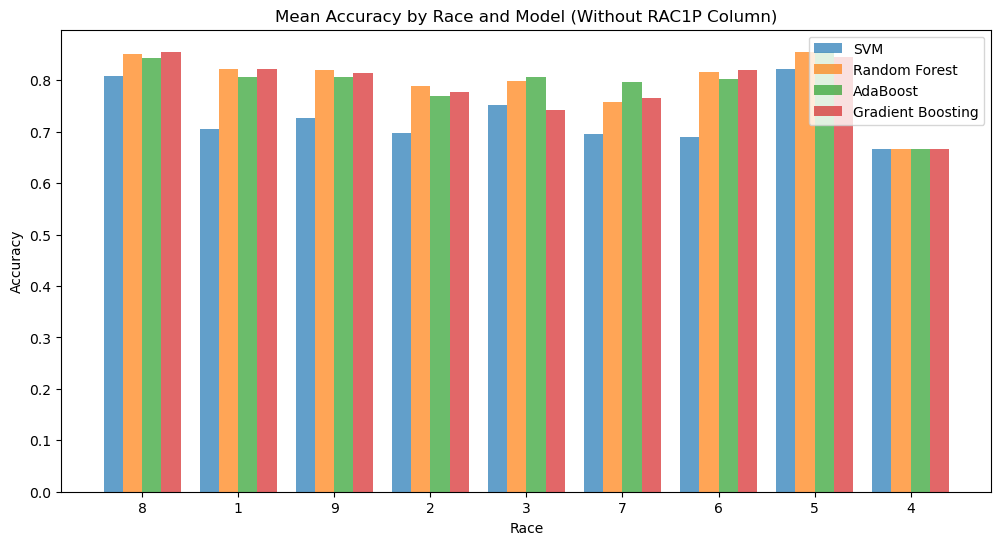

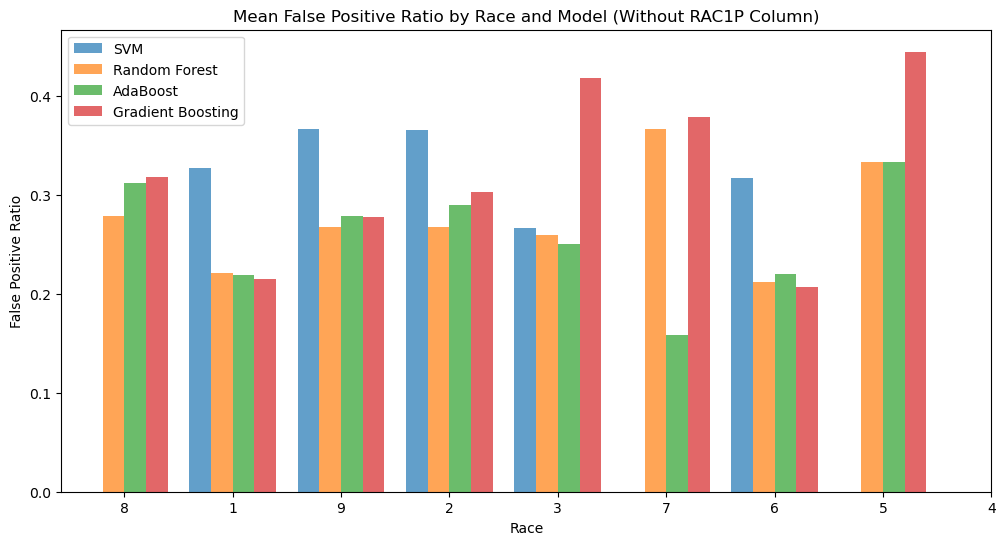

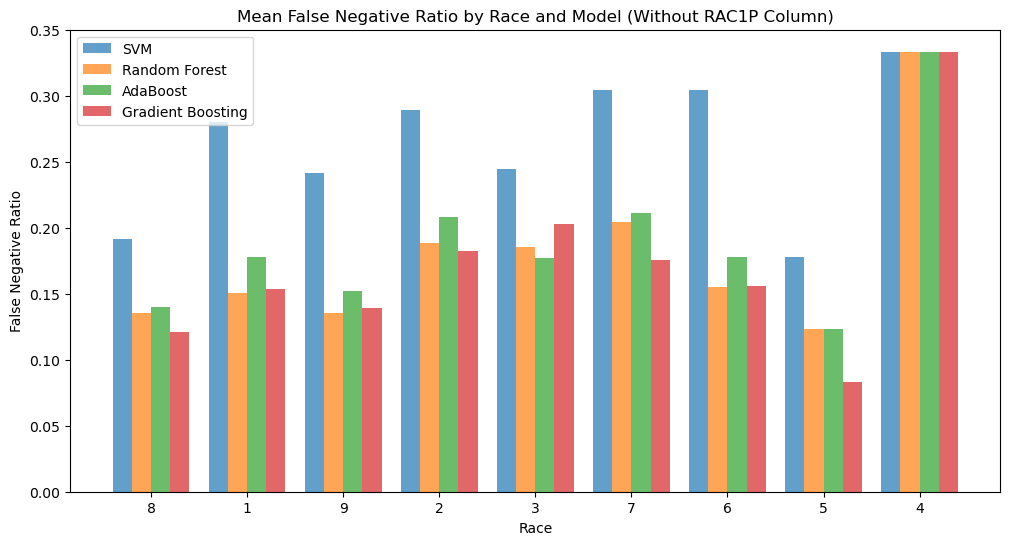

In [43]:
saccuracies_svm = np.array(saccuracies_svm)
saccuracies_rf = np.array(saccuracies_rf)
saccuracies_ab = np.array(saccuracies_ab)
saccuracies_gb = np.array(saccuracies_gb)

sfalse_positive_svm = np.array(sfalse_positive_svm)
sfalse_positive_rf = np.array(sfalse_positive_rf)
sfalse_positive_ab = np.array(sfalse_positive_ab)
sfalse_positive_gb = np.array(sfalse_positive_gb)

sfalse_negative_svm = np.array(sfalse_negative_svm)
sfalse_negative_rf = np.array(sfalse_negative_rf)
sfalse_negative_ab = np.array(sfalse_negative_ab)
sfalse_negative_gb = np.array(sfalse_negative_gb)

bar_width = 0.2
bar_positions = np.arange(len(races))

plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 1.5 * bar_width, saccuracies_svm, width=bar_width, label='SVM', alpha=0.7)
plt.bar(bar_positions - 0.5 * bar_width, saccuracies_rf, width=bar_width, label='Random Forest', alpha=0.7)
plt.bar(bar_positions + 0.5 * bar_width, saccuracies_ab, width=bar_width, label='AdaBoost', alpha=0.7)
plt.bar(bar_positions + 1.5 * bar_width, saccuracies_gb, width=bar_width, label='Gradient Boosting', alpha=0.7)

plt.title('Mean Accuracy by Race and Model (Without RAC1P Column)')
plt.xlabel('Race')
plt.ylabel('Accuracy')
plt.xticks(bar_positions, races)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 1.5 * bar_width, sfalse_positive_svm, width=bar_width, label='SVM', alpha=0.7)
plt.bar(bar_positions - 0.5 * bar_width, sfalse_positive_rf, width=bar_width, label='Random Forest', alpha=0.7)
plt.bar(bar_positions + 0.5 * bar_width, sfalse_positive_ab, width=bar_width, label='AdaBoost', alpha=0.7)
plt.bar(bar_positions + 1.5 * bar_width, sfalse_positive_gb, width=bar_width, label='Gradient Boosting', alpha=0.7)

plt.title('Mean False Positive Ratio by Race and Model (Without RAC1P Column)')
plt.xlabel('Race')
plt.ylabel('False Positive Ratio')
plt.xticks(bar_positions, races)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(bar_positions - 1.5 * bar_width, sfalse_negative_svm, width=bar_width, label='SVM', alpha=0.7)
plt.bar(bar_positions - 0.5 * bar_width, sfalse_negative_rf, width=bar_width, label='Random Forest', alpha=0.7)
plt.bar(bar_positions + 0.5 * bar_width, sfalse_negative_ab, width=bar_width, label='AdaBoost', alpha=0.7)
plt.bar(bar_positions + 1.5 * bar_width, sfalse_negative_gb, width=bar_width, label='Gradient Boosting', alpha=0.7)

plt.title('Mean False Negative Ratio by Race and Model (Without RAC1P Column)')
plt.xlabel('Race')
plt.ylabel('False Negative Ratio')
plt.xticks(bar_positions, races)
plt.legend()
plt.show()

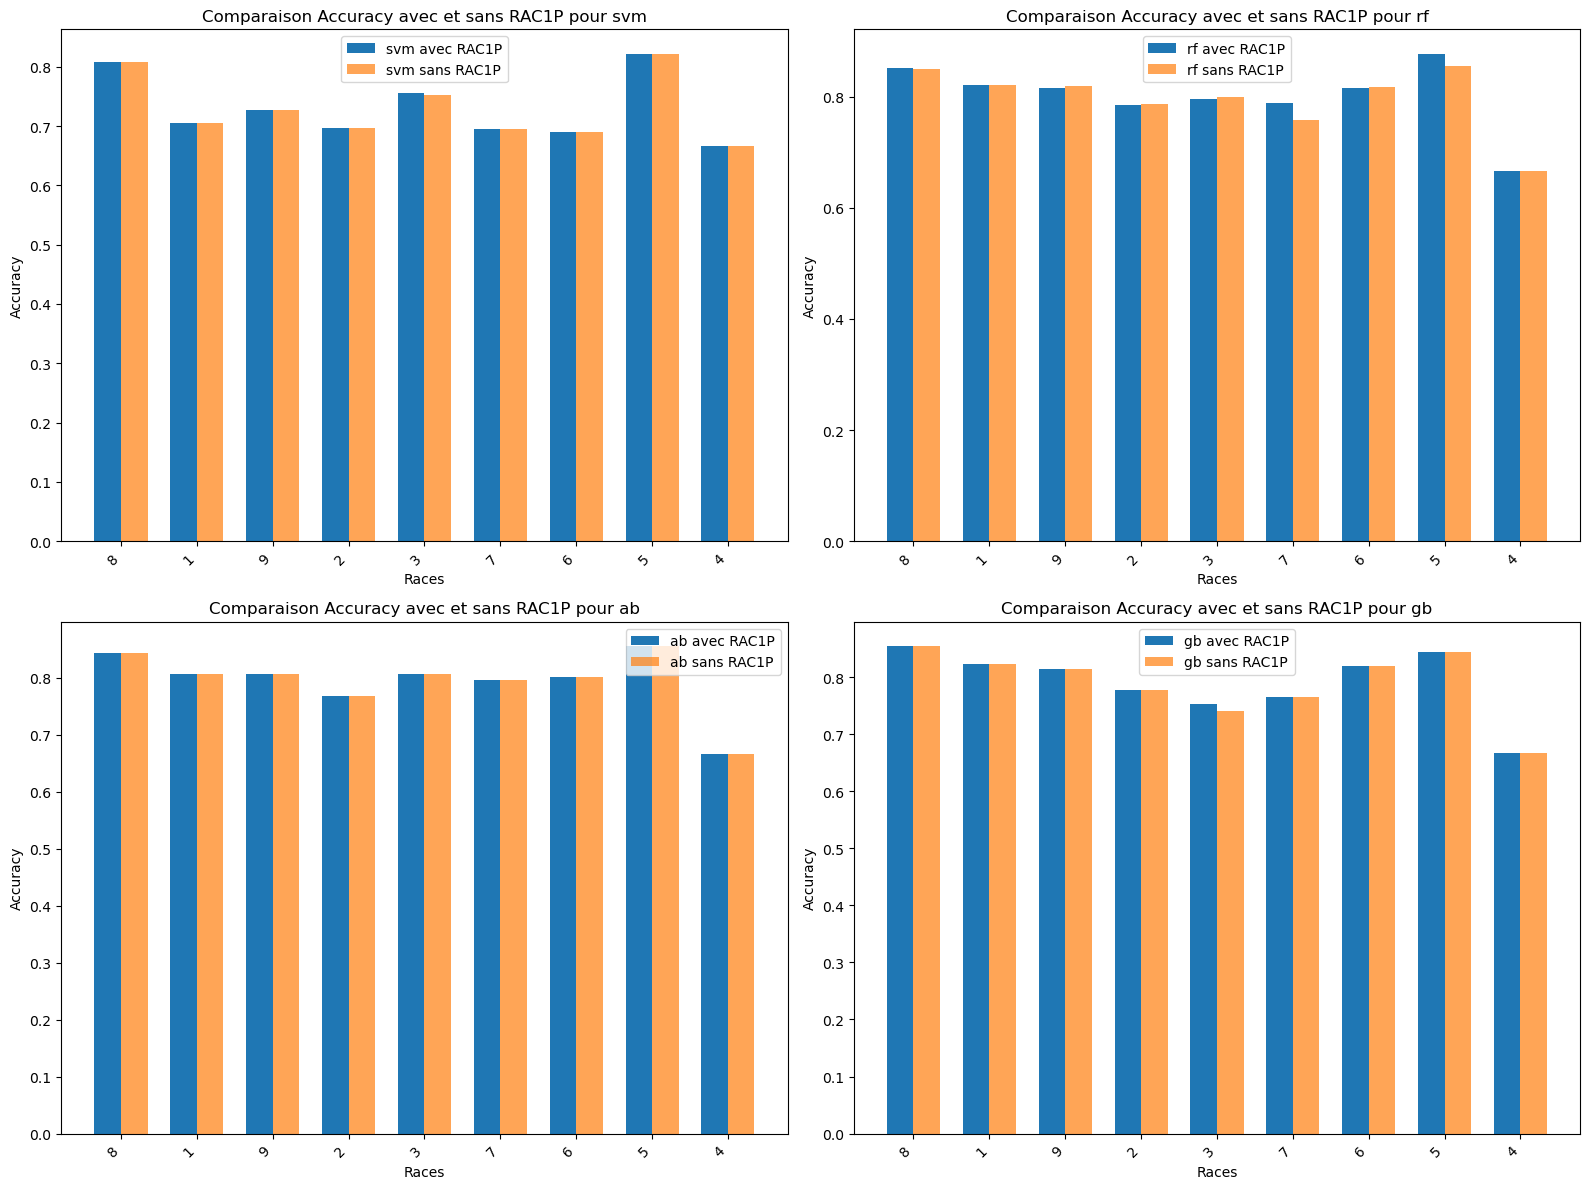

In [44]:
models = ['svm', 'rf', 'ab', 'gb']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))


bar_width = 0.35

for i, model in enumerate(models):
    row = i // 2
    col = i % 2

    ax = axes[row, col]

    bar1 = ax.bar(index - bar_width / 2, globals()['accuracies_' + model], bar_width, label=f'{model} avec RAC1P')
    bar2 = ax.bar(index + bar_width / 2, globals()['saccuracies_' + model], bar_width, label=f'{model} sans RAC1P', alpha=0.7)

    ax.set_xlabel('Races')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'Comparaison Accuracy avec et sans RAC1P pour {model}')
    ax.set_xticks(index)
    ax.set_xticklabels(races, rotation=45, ha="right")
    ax.legend()

plt.tight_layout() 
plt.show()

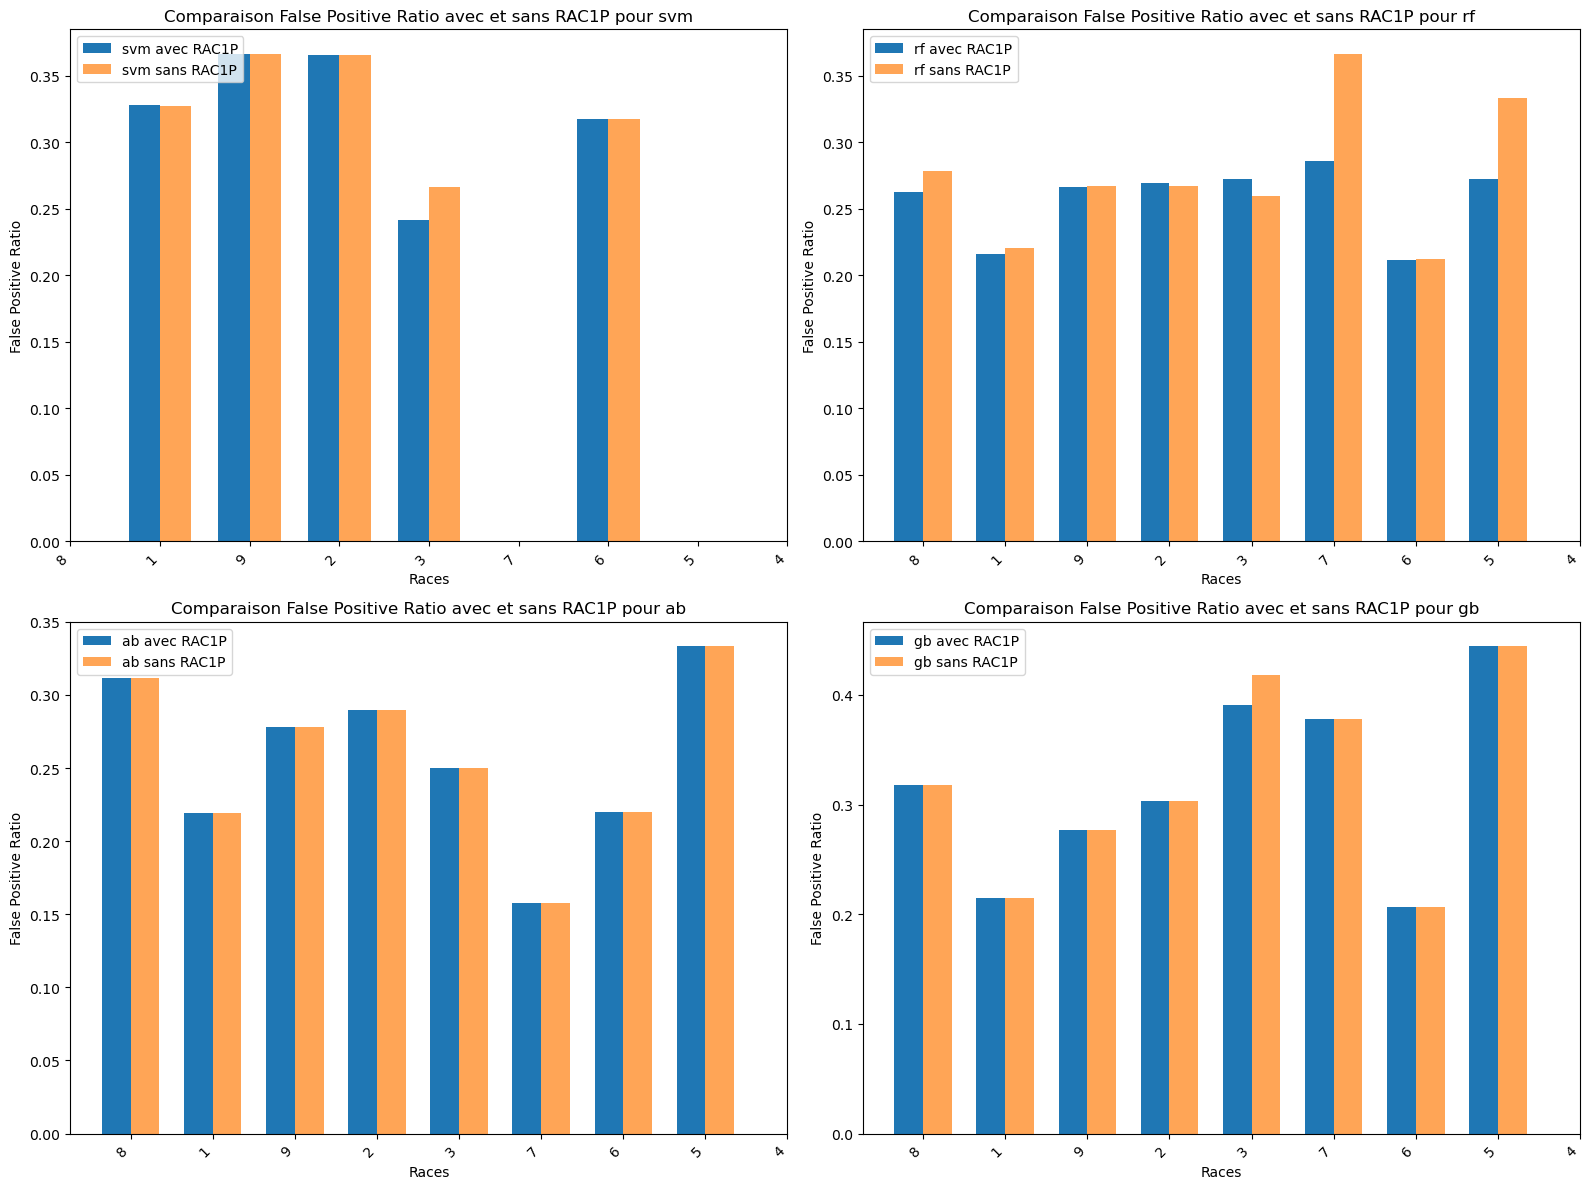

In [45]:
models = ['svm', 'rf', 'ab', 'gb']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))


bar_width = 0.35

for i, model in enumerate(models):
    row = i // 2
    col = i % 2

    ax = axes[row, col]

    bar1 = ax.bar(index - bar_width / 2, globals()['false_positive_' + model], bar_width, label=f'{model} avec RAC1P')
    bar2 = ax.bar(index + bar_width / 2, globals()['sfalse_positive_' + model], bar_width, label=f'{model} sans RAC1P', alpha=0.7)

    ax.set_xlabel('Races')
    ax.set_ylabel('False Positive Ratio')
    ax.set_title(f'Comparaison False Positive Ratio avec et sans RAC1P pour {model}')
    ax.set_xticks(index)
    ax.set_xticklabels(races, rotation=45, ha="right")
    ax.legend()

plt.tight_layout() 
plt.show()

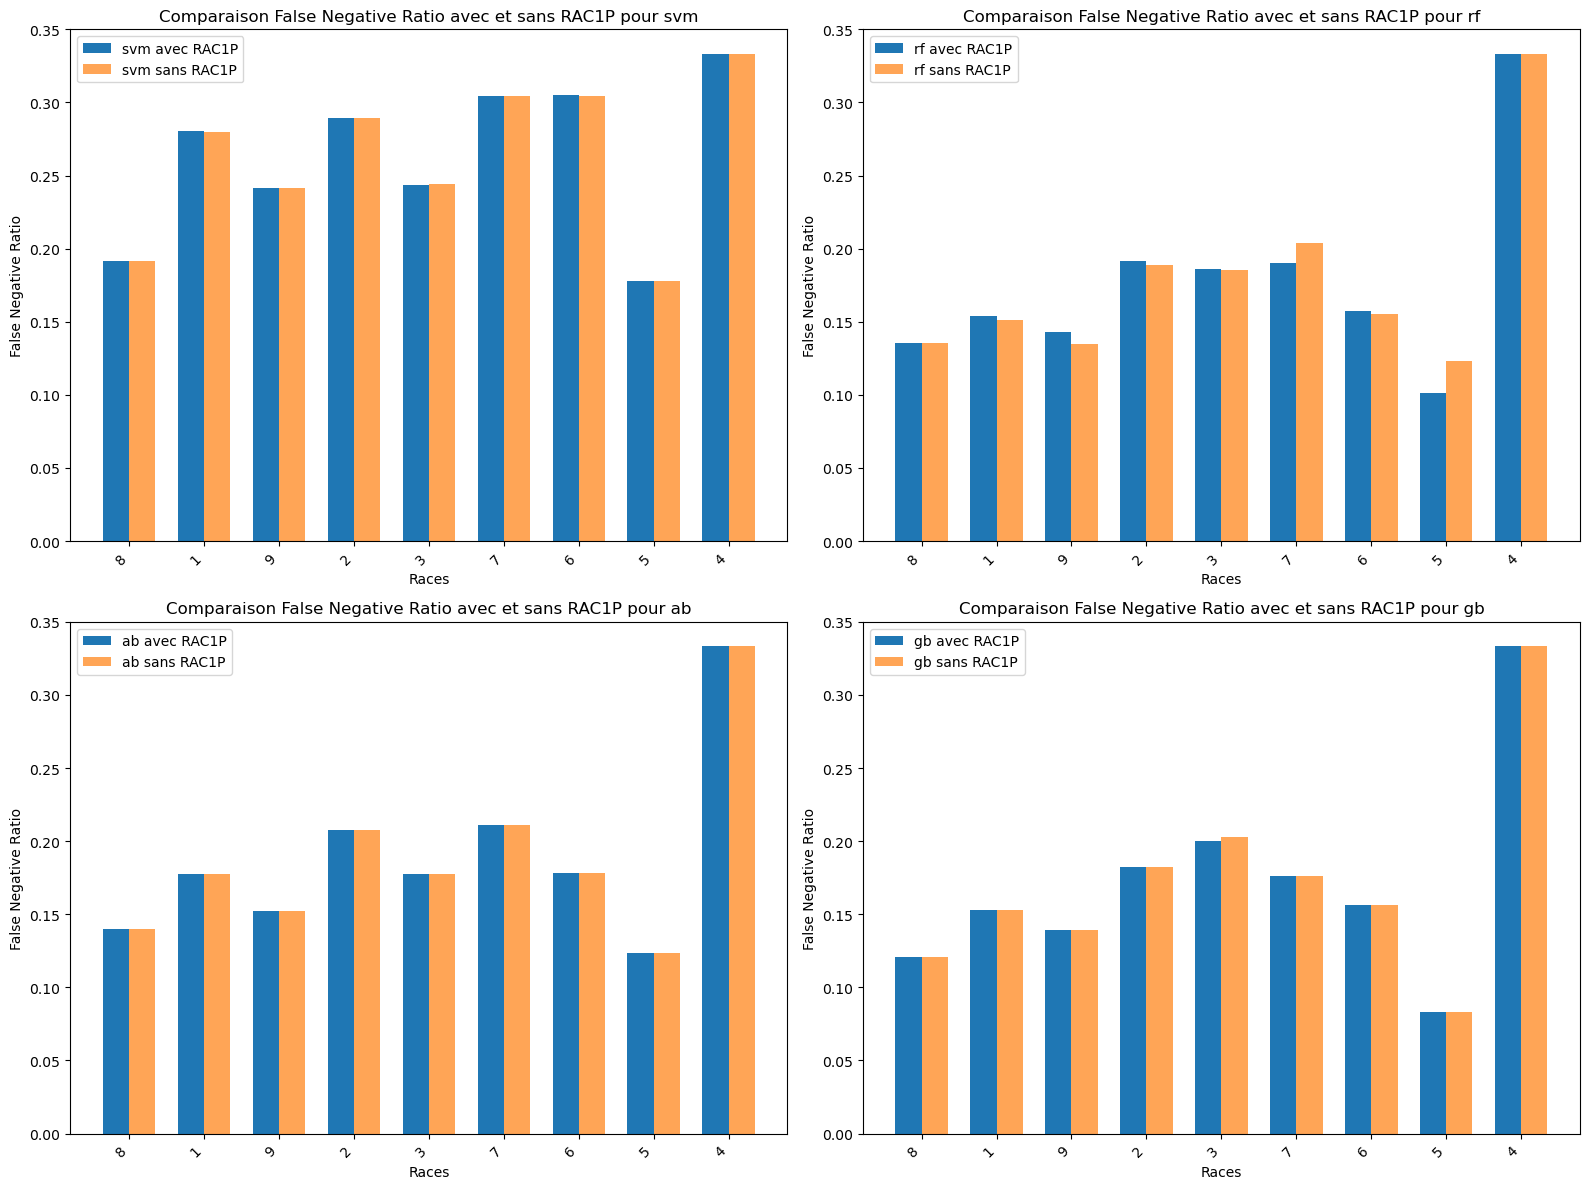

In [46]:
models = ['svm', 'rf', 'ab', 'gb']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

bar_width = 0.35

for i, model in enumerate(models):
    row = i // 2
    col = i % 2

    ax = axes[row, col]

    bar1 = ax.bar(index - bar_width / 2, globals()['false_negative_' + model], bar_width, label=f'{model} avec RAC1P')
    bar2 = ax.bar(index + bar_width / 2, globals()['sfalse_negative_' + model], bar_width, label=f'{model} sans RAC1P', alpha=0.7)

    ax.set_xlabel('Races')
    ax.set_ylabel('False Negative Ratio')
    ax.set_title(f'Comparaison False Negative Ratio avec et sans RAC1P pour {model}')
    ax.set_xticks(index)
    ax.set_xticklabels(races, rotation=45, ha="right")
    ax.legend()

plt.tight_layout()
plt.show()